In [3]:
#!pip install soundfile -> 웹 url 음악로드 하고 저장
#!pip install librosa  -> 음악과 오디오를 처리하는 python 분석모듈
#!pip install --upgrade paramiko -> 추가 패키지 업데이트

### API 샘플 코드를 실행해보자 

In [19]:
import librosa
filename = librosa.example('nutcracker')
#librosa.load(path, *, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='soxr_hq')
y,sr = librosa.load(filename,duration=20)

In [20]:
import IPython.display
IPython.display.Audio(data=y,rate=sr)

In [22]:
print(y) #실제음성
print(sr) #표본 샘플
print('전체 오디오 샘플 수 :',len(y))
print('전체 오디오 샘플 속도 :',len(y)/sr)

[ 2.2716868e-06  5.3327185e-06 -7.2473276e-06 ...  7.9551987e-02
  7.2584212e-02  6.9123760e-02]
22050
전체 오디오 샘플 수 : 441000
전체 오디오 샘플 속도 : 20.0


In [28]:
#소리파일의 템포를 비트로 감지 해보자 -> 소리 리듬정보를 리턴
#beat per minute -> BPM : 1분간 박수를 나타내는 값 , 곡의 템포를 나타내는 숫자로 리턴

tempo,beat_times = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo : {:.2f} beats per minute'.format(tempo))

#추출된 비트 프레임을 시간(초)로 변환 -> 음악 분석 작업
beat_times = librosa.frames_to_time(beat_times,sr=sr)
print(beat_times)

Estimated tempo : 112.35 beats per minute
[ 1.18421769  1.71827664  2.32199546  2.87927438  3.45977324  4.01705215
  4.59755102  5.13160998  5.7353288   6.29260771  6.84988662  7.40716553
  7.9876644   8.54494331  9.12544218  9.63628118 10.21678005 10.72761905
 11.28489796 11.79573696 12.32979592 12.86385488 13.42113379 13.95519274
 14.4892517  15.02331066 15.55736961 16.09142857 16.62548753 17.15954649]


Text(0.5, 1.0, 'nutcracker')

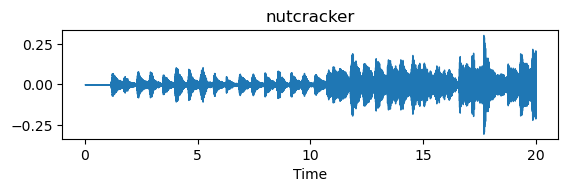

In [30]:
#시각화 -> 오디오 신호를 진폭을 시간별로 확인 해보자
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(3,1,1)
librosa.display.waveshow(y,sr=sr) #웨이브폼을 그래프로 표시 -> 오디오 진폭
plt.title('nutcracker')

In [32]:
#API 샘플 코드 실행 하모니를 살펴보자 HPSS(Harmonics/percussives Sound Separation)
#음원중에 조파음.타악기 음 -> 시간방향으로 또는 주파수 방향으로 매끄러운 소리를 제외한 작업

y_harmonic , y_percussive = librosa.effects.hpss(y) #양자화 분리 작업 -> 음성인식

print(y_harmonic.shape)
print(y_harmonic) #오디오 신호의 하모니 값
print(y_percussive)

(441000,)
[ 9.6558688e-07  1.9192105e-06 -2.4968738e-06 ...  5.8013145e-02
  5.1643666e-02  4.2329021e-02]
[ 1.3061010e-06  3.4135082e-06 -4.7504541e-06 ...  2.1538837e-02
  2.0940546e-02  2.6794737e-02]


In [35]:
#멜로디 부분 확인
IPython.display.Audio(data=y_harmonic,rate=sr)

In [36]:
#타악기 음 확인 -> 비트추출 -> 리듬 분석
IPython.display.Audio(data=y_percussive,rate=sr)

Text(0.5, 1.0, 'harmonic')

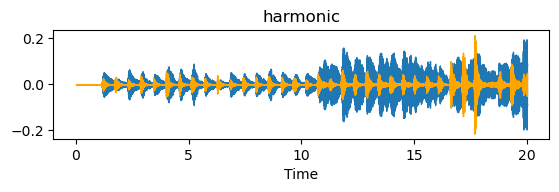

In [38]:
#시각화
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(3,1,1)
librosa.display.waveshow(y_harmonic,sr=sr)
librosa.display.waveshow(y_percussive,sr=sr,color='orange')
plt.title('harmonic')

In [40]:
#test.wav 파일을 읽어서 new_file.flac로 저장해보자
import soundfile as sf #read ,write()
audiodata ,samplerate = sf.read('img/test.wav')
sf.write('img/new_file.flac',data=audiodata,samplerate = samplerate)
IPython.display.Audio(data=audiodata,rate=samplerate)

In [41]:
IPython.display.Audio('img/new_file.flac')

In [42]:
IPython.display.Audio("http://www.nch.com.au/acm/8k16bitpcm.wav")

In [55]:
# http://www.nch.com.au/acm/8k16bitpcm.wav 파일을  new_file.flac로 저장해서 들어 보자
import requests
from IPython.display import Audio
import soundfile as sf
import matplotlib.pyplot as plt

# 외부 URL에서 오디오 파일을 가져옵니다.
url = "http://www.nch.com.au/acm/8k16bitpcm.wav"
response = requests.get(url)

with open('img/new_file02.flac','wb') as f:
    f.write(response.content)


y ,sr = sf.read('img/new_file02.flac')   
harmonic , percussive = librosa.effects.hpss(y) #양자화 분리 작업 -> 음성인식

Text(0.5, 1.0, 'percussive')

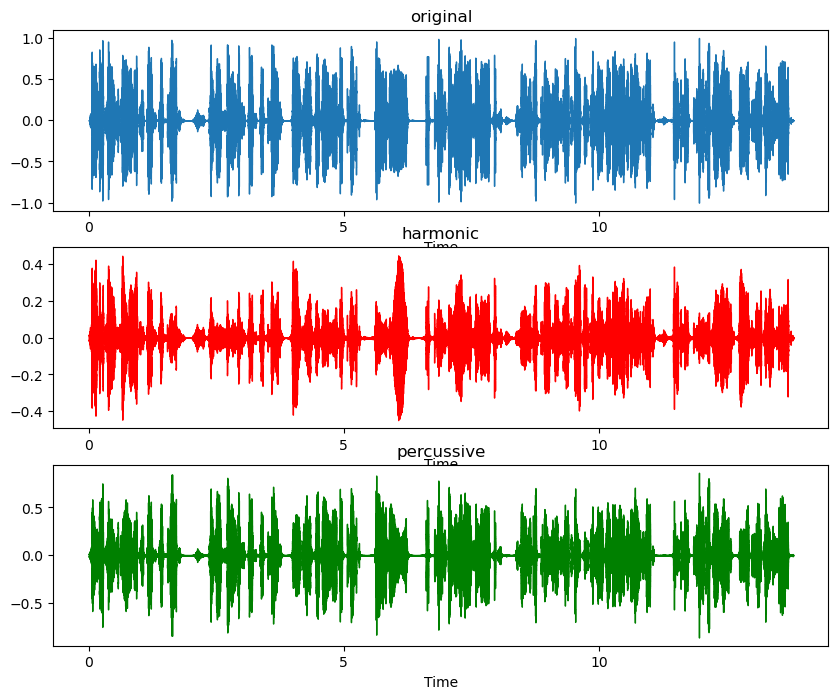

In [56]:
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
librosa.display.waveshow(y,sr=sr)
plt.title('original')

plt.subplot(3,1,2)
librosa.display.waveshow(harmonic,sr=sr,color='r')
plt.title('harmonic')

plt.subplot(3,1,3)
librosa.display.waveshow(y_percussive,sr=sr,color='g')
plt.title('percussive')

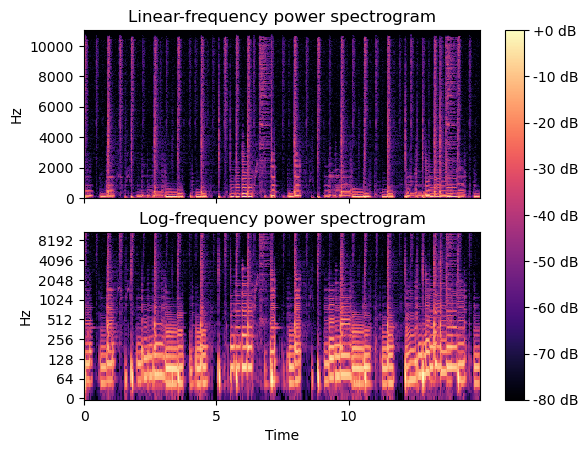

In [59]:
import matplotlib.pyplot as plt
import numpy as np
y, sr = librosa.load(librosa.ex('choice'), duration=15)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
# 단시간에 푸리에 변환 -> 절댓값 변환 -> DB(데시벨) 단위로 변환 -> 스케일리중 참조값은 최대값으로 하겠다
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

#d값을 선형 주파수로 서브플랏으로 표시하곘다
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024 #푸리에 연산시 오프 길이를 재지정
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),ref=np.max)

#로그 주파수 스케일로 확인하곘다
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

주어진 음악을 볼륨을 구해보자
데이터로드 -> 특징추출 -> 데시벨 볼륨을 구한다 -> 소리의 강도

In [61]:
y,sr = librosa.load(librosa.ex('nutcracker'),duration=15)

D = librosa.stft(y) #로드된 데이터를 스펙트럼 알고리즘 적용
print('스펙트롬 데이터 확인 :',D)

#np.abs(D) > 0.01 조건에 만족하면 D, 아니면 0
D=np.where(np.abs(D) > 0.01,D,0)
print('잡음 제거 후',D)

스펙트롬 데이터 확인 : [[-1.1307295e-05+0.00000000e+00j -5.7127490e-06+0.00000000e+00j
   6.3496448e-09+0.00000000e+00j ... -8.8571206e-02+0.00000000e+00j
  -5.8243487e-02+0.00000000e+00j -1.2094434e-01+0.00000000e+00j]
 [ 1.1311832e-05-1.25386563e-07j  5.4312935e-08+5.71786495e-06j
   6.0354242e-09+4.70248618e-10j ...  7.2344735e-02-5.42483479e-02j
   5.0025105e-02+8.14172775e-02j -3.6053970e-02-1.44294724e-01j]
 [-1.1332903e-05+2.60740990e-07j  5.7390030e-06-1.17597466e-07j
  -3.9080139e-09-6.14331030e-09j ... -4.8473205e-05+1.25643149e-01j
   4.4928305e-02-1.13755807e-01j  1.4596328e-01-1.75427031e-02j]
 ...
 [-2.6524320e-05+3.05527396e-06j  1.0099343e-05+3.45195303e-07j
   1.9024591e-06-1.38161897e-06j ... -1.9668269e-07-1.18952507e-07j
   1.6070386e-07+7.51668665e-08j -1.0084386e-02+1.48077917e-04j]
 [ 2.8475890e-05-3.94238327e-07j  9.4403890e-07-1.47939390e-05j
  -1.5122148e-06-4.73091006e-07j ...  1.1400229e-07+9.13535416e-08j
   3.2769776e-07+2.21271286e-08j -7.3652642e-05-1.00843348e-0

In [62]:
y_filtered = librosa.istft(D) #역 푸리에 변환
IPython.display.Audio(data=y_filtered,rate=sr)

Text(0.5, 1.0, 'before')

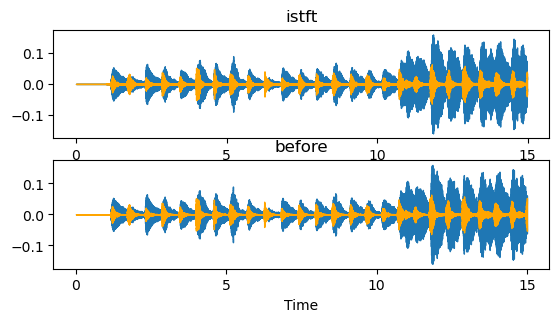

In [64]:
#시각화
import matplotlib.pyplot as plt

y_harmonic , y_percussive = librosa.effects.hpss(y_filtered) #잡음 후

h,p = librosa.effects.hpss(y) #잡음 전

plt.figure()
plt.subplot(3,1,1)
librosa.display.waveshow(y_harmonic,sr=sr)
librosa.display.waveshow(y_percussive,sr=sr,color='orange')
plt.title('istft')


plt.subplot(3,1,2)
librosa.display.waveshow(h,sr=sr)
librosa.display.waveshow(p,sr=sr,color='orange')
plt.title('before')

In [86]:
#exam11) 작은별에 배경음악에 사람음성을 결합한 다음 오디오로 들어보자.  'img/my_test.wav'
from IPython.display import display, Audio 

voice_filename = 'img/my_test.wav'
music_filename = 'img/작은별.mp3'

#1. 작은별 hpss 으로 분류 
music_data, sr_music = librosa.load(music_filename, sr=None)
harmonic_music, _ = librosa.effects.hpss(music_data)

#2. 사람음성  hpss 으로 분류 
voice_data, sr_voice = librosa.load(voice_filename, sr=None)
harmonic_voice, _ = librosa.effects.hpss(voice_data)

#3. 결합 
#3-1 길이 마추기
if sr_voice != sr_music:
    harmonic_music = librosa.resample(harmonic_music, orig_sr=sr_music, target_sr=sr_voice)

# 길이 조정
min_len = min(len(harmonic_voice), len(harmonic_music))
harmonic_voice = harmonic_voice[:min_len]
harmonic_music = harmonic_music[:min_len]
    
#3-2 결합
combined_audio = harmonic_voice + harmonic_music

#4. 오디오 확인 
display(Audio(data=combined_audio, rate=sr_voice))

In [92]:
#exam11) 작은별에 배경음악에 사람음성을 결합한 다음 오디오로 들어보자.  'img/my_test.wav'
from IPython.display import display, Audio 

voice_filename = 'img/my_test.wav'
music_filename = 'img/작은별.mp3'

#1. 작은별 hpss 으로 분류 
music_data, sr_music = librosa.load(music_filename, sr=None)
harmonic_music, percussive_music  = librosa.effects.hpss(music_data)

#2. 사람음성  hpss 으로 분류 
voice_data, sr_voice = librosa.load(voice_filename, sr=None)
harmonic_voice, percussive_voice = librosa.effects.hpss(voice_data)

#3. 결합 
#3-1 길이 마추기
if sr_voice != sr_music:
    percussive_voice = librosa.resample(percussive_music, orig_sr=sr_music, target_sr=sr_voice)

# 길이 조정
min_len = min(len(harmonic_voice), len(harmonic_music))
harmonic_voice = harmonic_voice[:min_len]
percussive_music = percussive_voice[:min_len]
    
#3-2 결합
combined_audio = harmonic_voice + percussive_music

#4. 오디오 확인 
display(Audio(data=combined_audio, rate=sr_voice))

In [91]:
#exam11) 노이즈 제거해보자
from IPython.display import display, Audio 

voice_filename = 'img/my_test.wav'
music_filename = 'img/작은별.mp3'

#1. 작은별 hpss 으로 분류 
music_data, sr_music = librosa.load(music_filename, sr=None)
music_data = 0.1*music_data
harmonic_music, percussive_music  = librosa.effects.hpss(music_data)

#2. 사람음성  hpss 으로 분류 
voice_data, sr_voice = librosa.load(voice_filename, sr=None)
harmonic_voice, percussive_voice = librosa.effects.hpss(voice_data)
harmonic_voice = 2* harmonic_voice

harmonic_voice_processed = np.where(np.abs(harmonic_voice) > 0.03,harmonic_voice,0)

#3. 결합 
#3-1 길이 마추기
if sr_voice != sr_music:
    percussive_voice = librosa.resample(percussive_music, orig_sr=sr_music, target_sr=sr_voice)

# 길이 조정
min_len = min(len(harmonic_voice), len(harmonic_music))
harmonic_voice = harmonic_voice_processed[:min_len]
percussive_music = percussive_music[:min_len]
    
#3-2 결합
combined_audio = harmonic_voice + percussive_music

#4. 오디오 확인 
display(Audio(data=combined_audio, rate=sr_voice))